In [1]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max

# 1. Высокочастотная фильтрация на основе ядра Гаусса

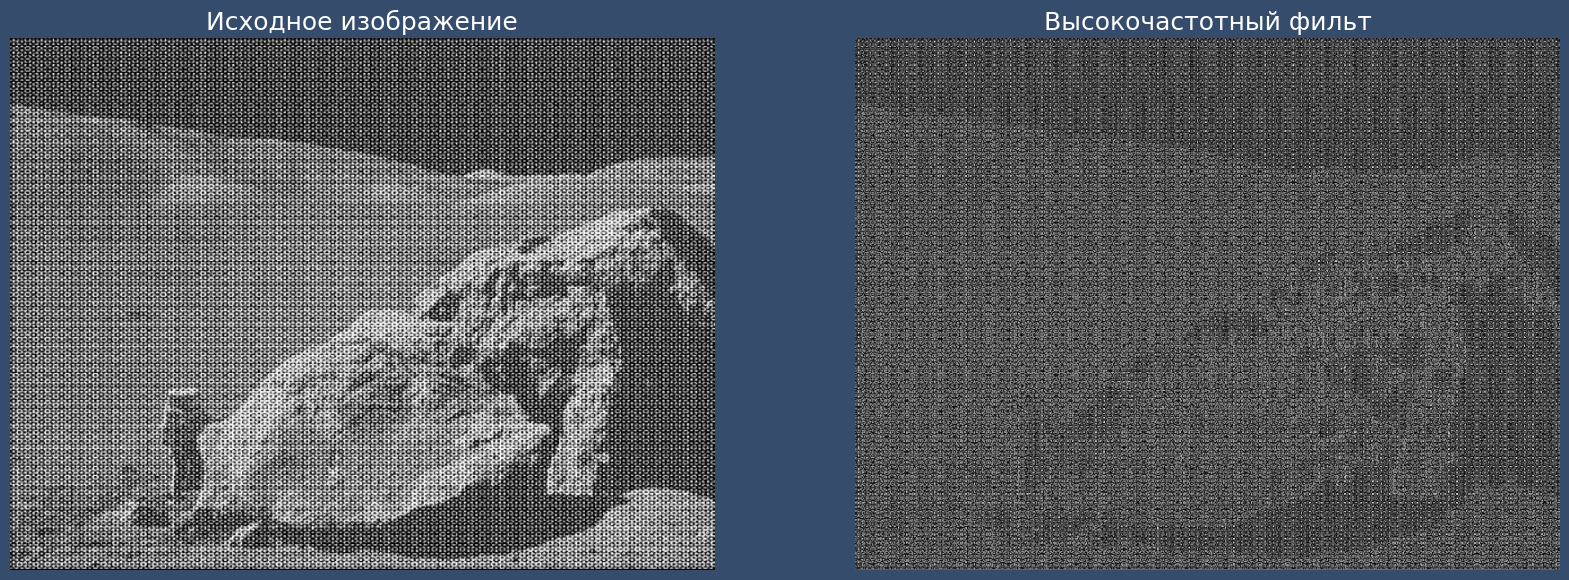

In [2]:
image = cv2.imread('periodic_noise.jpg', cv2.IMREAD_GRAYSCALE)

rows, cols = image.shape
x, y = np.meshgrid(np.arange(0, cols, 1), np.arange(0, rows, 1))
center_x = cols // 2
center_y = rows // 2
sigma = 30
low_pass  = np.exp(-((x - center_x)**2 + (y - center_y)**2) / (2 * (sigma**2)))
high_pass = 1 - low_pass

dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
dft_shift_HP = dft_shift * high_pass[:, :, np.newaxis]
ifftshift_HP = np.fft.ifftshift(dft_shift_HP)
img_HP = cv2.idft(ifftshift_HP)
img_HP = cv2.magnitude(img_HP[:, :, 0], img_HP[:, :, 1])

plt.figure(figsize=(20, 10), facecolor='#354c6c')

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Исходное изображение', color='white', fontsize=18)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Высокочастотный фильт', color='white', fontsize=18)
plt.imshow(img_HP, cmap='gray')

plt.show()


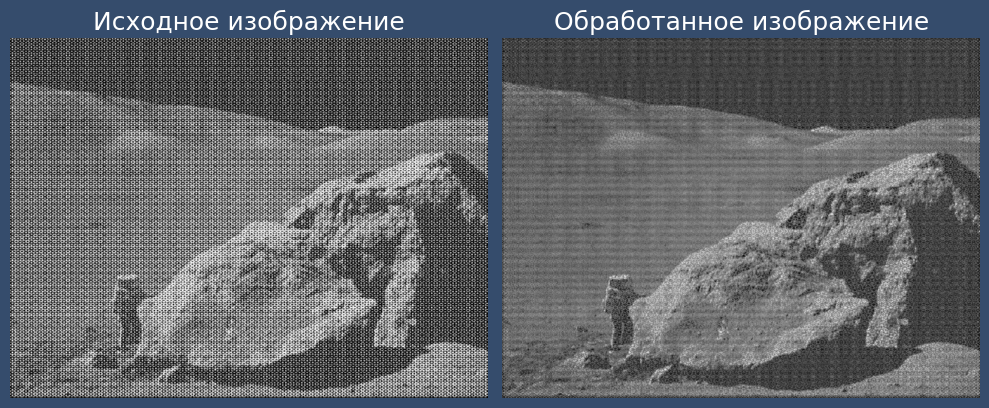

In [ ]:
rows, cols = image.shape
center_x = cols // 2
center_y = rows // 2
center_radius = min(rows, cols) // 10

dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1e-8)
threshold = np.percentile(magnitude, 99)
noise_mask = magnitude > threshold

filter_mask = np.ones((rows, cols, 2), np.float32)
Y, X = np.ogrid[:rows, :cols]
dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
# Создаём булеву маску для удаления шумов вне центра
mask_outside_center = (noise_mask) & (dist_from_center > center_radius)
# Индексы для удаления
rows_idx, cols_idx = np.where(mask_outside_center)
# Обнуляем симметричные точки
filter_mask[rows_idx, cols_idx] = 0
filter_mask[rows - 1 - rows_idx, cols - 1 - cols_idx] = 0

fshift = dft_shift * filter_mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.figure(figsize=(10, 5), facecolor='#354c6c')

plt.subplot(1, 2, 1)
plt.title('Исходное изображение', color='white', fontsize=18)
plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Обработанное изображение', color='white', fontsize=18)
plt.axis('off')
plt.imshow(img_back, cmap='gray')

plt.tight_layout()
plt.show()